# Instructions:

The aim of the project is to write a functional and structured code in python. This
code should be able to make a prediction on the dataset Auto Insurance available
on https://www.kaggle.com/c/auto-insurance-fall-2017/data of target TARGET_FLAG.
This code should also explicitly return the value of the performance of the algorithms
tested using the appropriate metric and generate a csv file with the predictions.
Performance is not the main goal. The objective of the project is to write the main steps of
a data science project in 2 hours with a proper style and well written comments.
The code should be written in python files or ipython notebook using the
appropriate libraries. We would rather have a link to a github repository.

For each observation in the test set, we have to predict the **TARGET_FLAG** binary outcome, given a set of independent variables. Thus, this can be either a logistic regression problem or a classification. Let's first import the data.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import io

In [55]:
train = pd.read_csv(r'https://raw.githubusercontent.com/Alexouu1/Descartes_Underwriting_Project/main/train_auto.csv')
test = pd.read_csv(r"https://raw.githubusercontent.com/Alexouu1/Descartes_Underwriting_Project/main/test_auto.csv")

In [56]:
train.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [7]:
test.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


In [8]:
test['TARGET_FLAG'].isnull().values.any()

True

Since the *TARGET_FLAG* variable is NaN here, this dataset cannot be used to tune our model since we will not be able to evaluate our predictions. We will keep this dataset for later though.

In [9]:
predictions = test # simple renaming without hard copying the df.
data = train # We will later split the data df into a traning and test set.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   TARGET_AMT   8161 non-null   float64
 3   KIDSDRIV     8161 non-null   int64  
 4   AGE          8155 non-null   float64
 5   HOMEKIDS     8161 non-null   int64  
 6   YOJ          7707 non-null   float64
 7   INCOME       7716 non-null   object 
 8   PARENT1      8161 non-null   object 
 9   HOME_VAL     7697 non-null   object 
 10  MSTATUS      8161 non-null   object 
 11  SEX          8161 non-null   object 
 12  EDUCATION    8161 non-null   object 
 13  JOB          7635 non-null   object 
 14  TRAVTIME     8161 non-null   int64  
 15  CAR_USE      8161 non-null   object 
 16  BLUEBOOK     8161 non-null   object 
 17  TIF          8161 non-null   int64  
 18  CAR_TYPE     8161 non-null   object 
 19  RED_CA

In [11]:
for col in data.columns:
    list_categories = data[col].unique()
    print("variable :", col+ " ; values :",list_categories)

variable : INDEX ; values : [    1     2     4 ... 10299 10301 10302]
variable : TARGET_FLAG ; values : [0 1]
variable : TARGET_AMT ; values : [   0.         2946.         4021.         ...  471.11545805 3135.
 1815.205097  ]
variable : KIDSDRIV ; values : [0 1 2 3 4]
variable : AGE ; values : [60. 43. 35. 51. 50. 34. 54. 37. 53. 55. 45. 39. 42. 31. 28. 48. 47. 44.
 33. 32. 40. 49. 52. 41. 56. 38. 63. 59. 46. 30. 29. 58. 36. 66. 61. 62.
 80. 57. 64. nan 25. 27. 26. 20. 21. 19. 72. 69. 24. 67. 23. 65. 70. 22.
 17. 16. 81. 73. 68. 18. 76.]
variable : HOMEKIDS ; values : [0 1 2 3 4 5]
variable : YOJ ; values : [11. 10. 14. nan 12.  7.  5.  0. 13.  9. 17.  8. 15. 16.  6. 18. 23.  3.
  4.  2. 19.  1.]
variable : INCOME ; values : ['$67,349' '$91,449' '$16,039' ... '$107,204' '$43,445' '$53,235']
variable : PARENT1 ; values : ['No' 'Yes']
variable : HOME_VAL ; values : ['$0' '$257,252' '$124,191' ... '$332,591' '$149,248' '$197,017']
variable : MSTATUS ; values : ['z_No' 'Yes']
variable : SE

# Types conversion

There are several data types issues.
INCOME, HOME_VAL, BLUEBOOK and OLDCLAIM variables are here categorical whereas they should be numerical (float). Conversions are thus need. We will apply these conversion to both our **data** and **predictions** DataFrames.

In [12]:
object_to_float = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']
data[object_to_float] = data[object_to_float].stack().str.replace(',','.').unstack() # this allow the following conversion to float.
predictions[object_to_float] = predictions[object_to_float].stack().str.replace(',','.').unstack()
for var in object_to_float:
    data[var] = data[var].str[1:].astype(float) # removing dollar sign and then converting column to float
    predictions[var] = predictions[var].str[1:].astype(float)

In total, there are 26 columns/variables: 1 target variable (TARGET_FLAG) and 25 independent variables (only 24 if we drop the *index* variable which is of no use). Also, we should drop the *TARGET_AMT* (target amount) variable since TARGET_FLAG=0 when TARGET_AMT=0 and TARGET_FLAG=1 otherwise. The problem would thus be too simple if we had the TARGET_AMT values and that is why the entire TARGET_AMT column is NaN in the predictions set (see below).

In [13]:
predictions.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,52.881,No,0.0,...,21.97,1,Van,yes,0.000,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,50.815,Yes,0.0,...,18.93,6,Minivan,no,3.295,1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,43.486,Yes,0.0,...,5.90,10,z_SUV,no,0.000,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,21.204,Yes,0.0,...,9.23,6,Pickup,no,0.000,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,87.460,No,0.0,...,15.42,1,Minivan,yes,44.857,2,No,4,1.0,Highly Urban/ Urban


In [14]:
predictions['TARGET_AMT'].isnull().all() #all TARGET_AMT values are NaN in the predictions DataFrame.

True

In [16]:
# Now dropping INDEX and TARGET_AMT column in both df:
data.drop(['INDEX', 'TARGET_AMT'], axis = 1, inplace = True)
predictions.drop(['INDEX', 'TARGET_AMT'], axis = 1, inplace = True)
# We thus have 23 regressors left.

# Outliers detection

We are going to do this exploratory work on both **data** and **predictions** DataFrames.

## For the **data** DataFrame

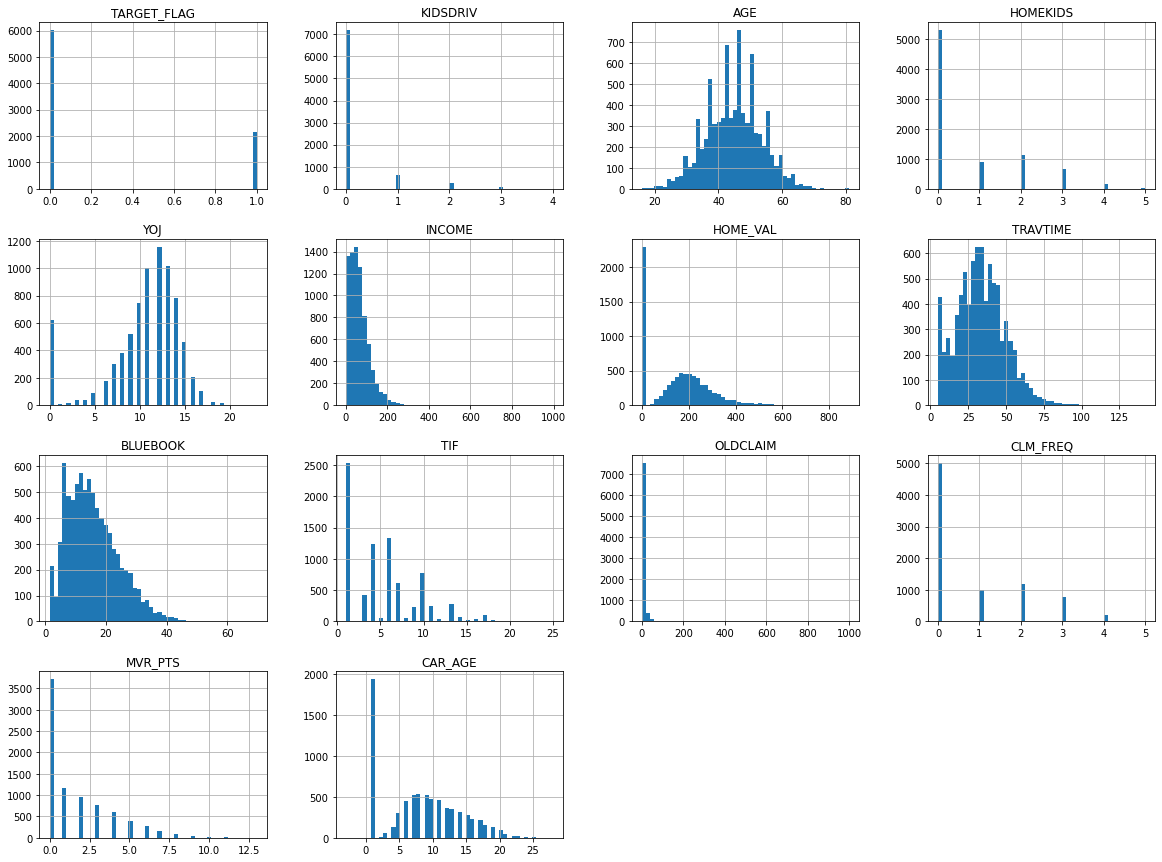

In [17]:
# For numerical variables

data.hist(bins=50, figsize=(20,15))
plt.show()

Note: 
 
1.   Zero for *HOME_VALUE* is not necessary an outlier, but it rather means the driver is not a homeowner.
2.   Zero for *INCOME* means the driver is not employed.

In [18]:
# For categorical variables:

cat_col = data.select_dtypes(exclude = 'number').columns
print(cat_col) # these are the categorical variables

Index(['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE',
       'RED_CAR', 'REVOKED', 'URBANICITY'],
      dtype='object')


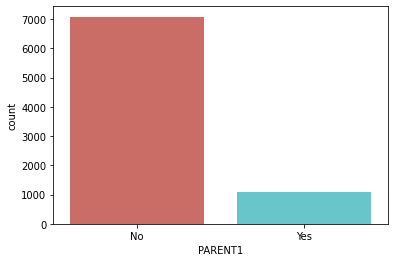

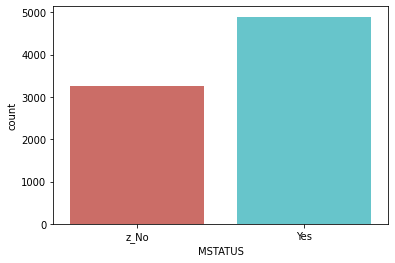

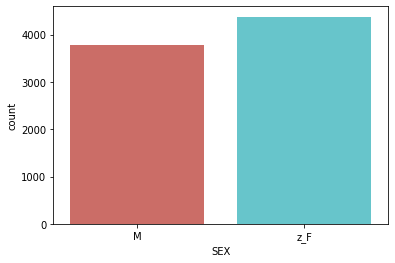

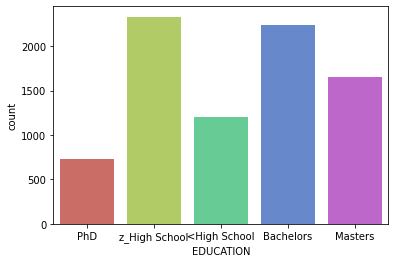

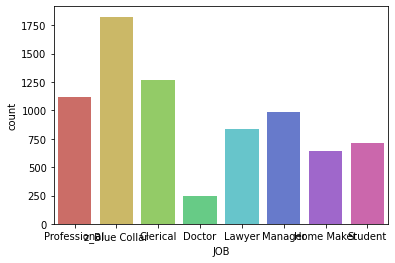

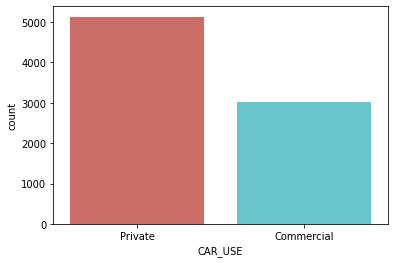

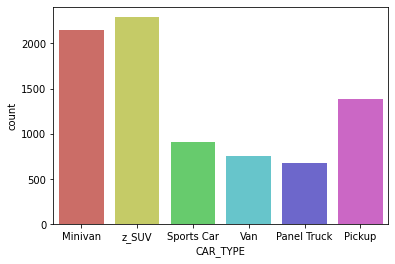

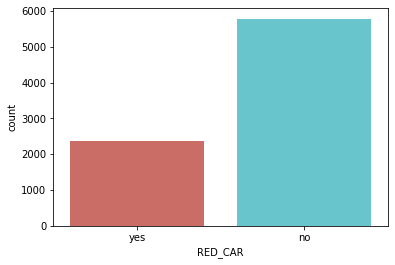

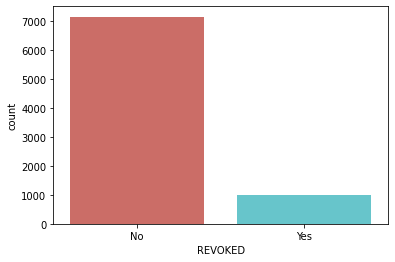

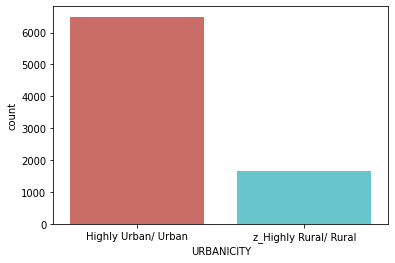

In [19]:
sns.countplot(x = 'PARENT1', data = data, palette = 'hls')
plt.show()
sns.countplot(x = 'MSTATUS', data = data, palette = 'hls')
plt.show()
sns.countplot(x = 'SEX', data = data, palette = 'hls')
plt.show()
sns.countplot(x = 'EDUCATION', data = data, palette = 'hls')
plt.show()
sns.countplot(x = 'JOB', data = data, palette = 'hls')
plt.show()
sns.countplot(x = 'CAR_USE', data = data, palette = 'hls')
plt.show()
sns.countplot(x = 'CAR_TYPE', data = data, palette = 'hls')
plt.show()
sns.countplot(x = 'RED_CAR', data = data, palette = 'hls')
plt.show()
sns.countplot(x = 'REVOKED', data = data, palette = 'hls')
plt.show()
sns.countplot(x = 'URBANICITY', data = data, palette = 'hls')
plt.show()

There does not seem to be any outlier here.

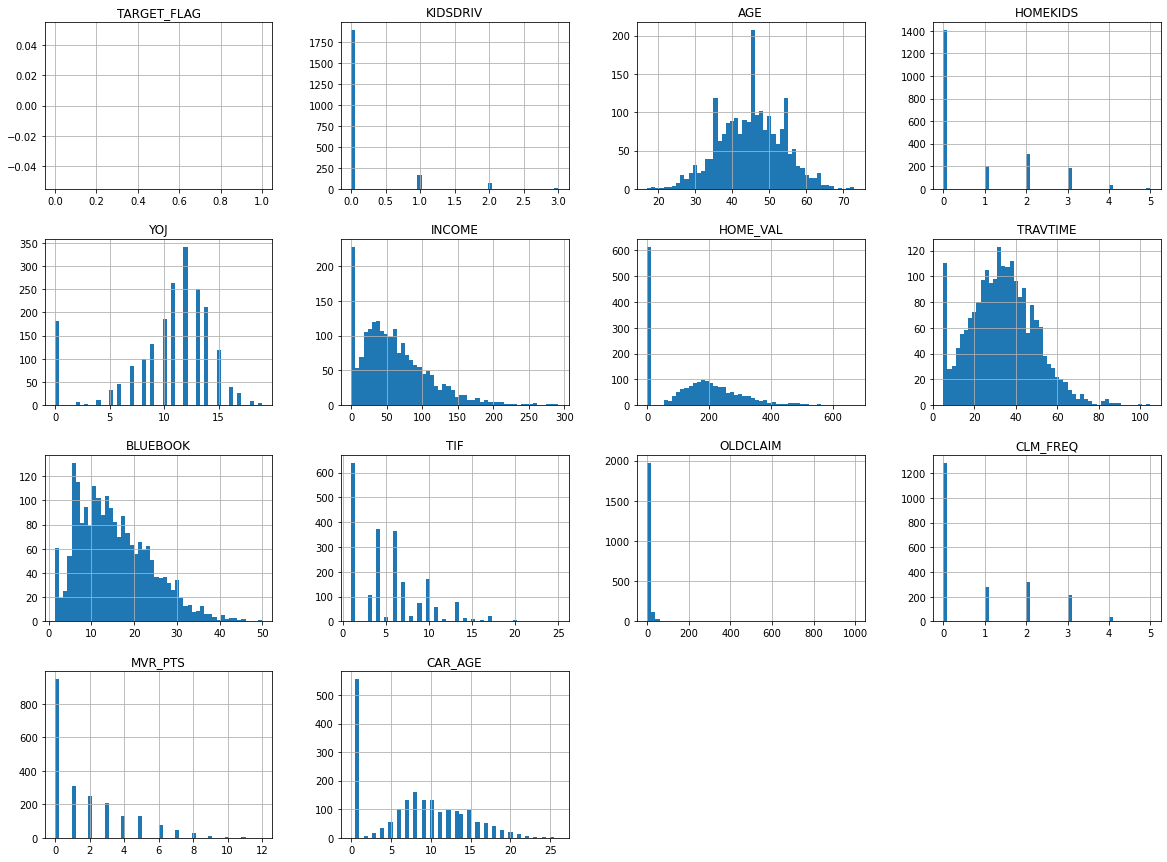

In [20]:
# For numerical variables

predictions.hist(bins=50, figsize=(20,15))
plt.show()

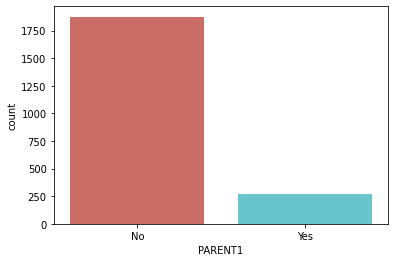

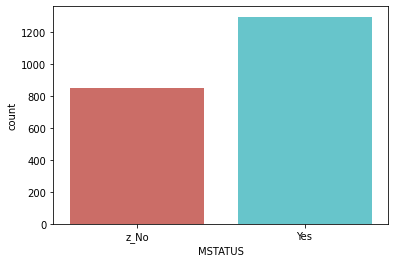

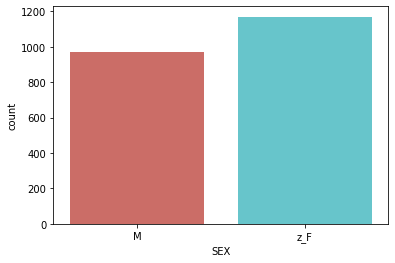

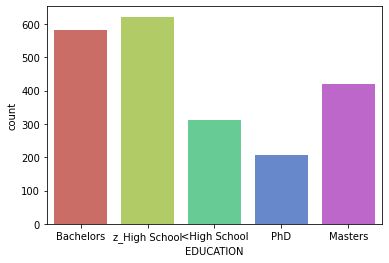

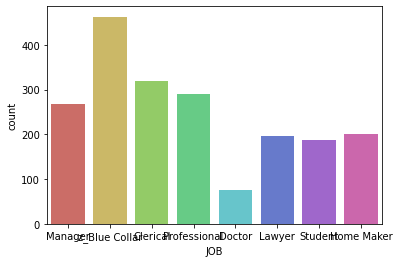

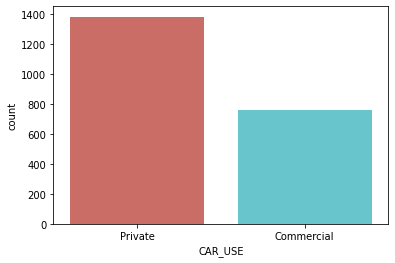

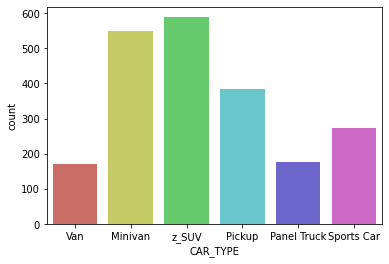

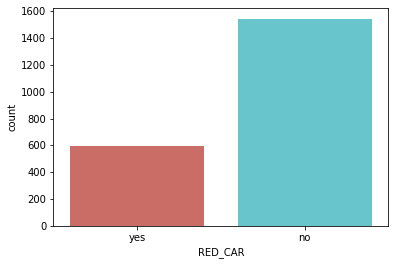

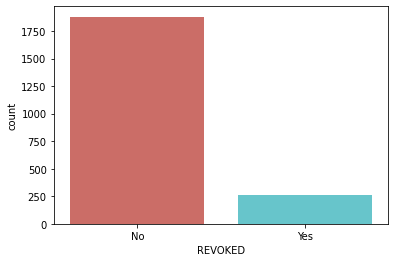

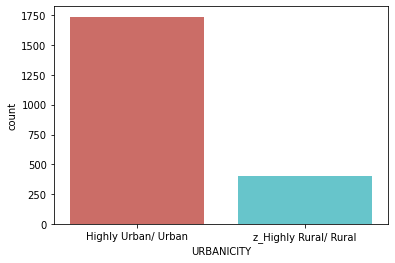

In [21]:
sns.countplot(x = 'PARENT1', data = predictions, palette = 'hls')
plt.show()
sns.countplot(x = 'MSTATUS', data = predictions, palette = 'hls')
plt.show()
sns.countplot(x = 'SEX', data = predictions, palette = 'hls')
plt.show()
sns.countplot(x = 'EDUCATION', data = predictions, palette = 'hls')
plt.show()
sns.countplot(x = 'JOB', data = predictions, palette = 'hls')
plt.show()
sns.countplot(x = 'CAR_USE', data = predictions, palette = 'hls')
plt.show()
sns.countplot(x = 'CAR_TYPE', data = predictions, palette = 'hls')
plt.show()
sns.countplot(x = 'RED_CAR', data = predictions, palette = 'hls')
plt.show()
sns.countplot(x = 'REVOKED', data = predictions, palette = 'hls')
plt.show()
sns.countplot(x = 'URBANICITY', data = predictions, palette = 'hls')
plt.show()

There does not seem to be any outlier either.

# Onto Scikit-Learn

## Logistic Regression
The first ML algorithm we are going to implement using Scikit-Learn is logistic regression. But first, there are a couple transformations that need to be applied to our dataset/variables.

In [22]:
data_lr = data.copy() #hard copy
predictions_lr = predictions.copy()

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

### Splitting our data
At this point, we shall split our **data** DataFrame into a training set and a test set.

In [25]:
Xdata_lr = data_lr.iloc[:,1:]
ydata_lr = data_lr.iloc[:,0]
Xtrain_lr, Xtest_lr, ytrain_lr, ytest_lr = train_test_split(Xdata_lr, ydata_lr, test_size=0.2, random_state = 42)

In [26]:
numlist = Xtrain_lr.select_dtypes(include = np.number)
numlist

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
3790,0,41.0,2,16.0,66.119,239.085,46,19.30,1,5.909,3,0,NaN
3779,1,45.0,2,15.0,64.916,232.064,57,21.27,1,958.000,1,2,12.0
7667,0,50.0,0,12.0,108.290,0.000,23,6.50,7,4.995,1,7,14.0
5562,0,40.0,0,9.0,103.903,0.000,57,15.02,6,8.921,1,6,14.0
1634,0,45.0,2,11.0,88.787,215.953,5,14.88,6,0.000,0,4,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0,41.0,3,11.0,88.426,0.000,9,14.44,4,6.193,3,2,5.0
5390,0,48.0,0,NaN,151.853,440.392,66,29.13,1,3.004,2,6,11.0
860,0,40.0,0,10.0,157.263,430.484,58,21.23,6,0.000,0,1,18.0
7603,0,50.0,0,14.0,60.854,NaN,28,28.33,10,607.000,3,4,7.0


### Scikit-learn Pipeline construction

In [27]:
numerical_features = make_column_selector(dtype_include = np.number)
categorical_features = make_column_selector(dtype_exclude = np.number)

In [28]:
numerical_pipeline = Pipeline([('mean_imputer', SimpleImputer()), ('scaler', StandardScaler())])
categorical_pipeline = Pipeline([('mode_imputer',SimpleImputer(strategy = 'most_frequent')), ('encoder',OneHotEncoder())])

In [29]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features), (categorical_pipeline, categorical_features))

### Logistic model fitting

In [30]:
model_lr = Pipeline([('prep', preprocessor), ('log_reg', LogisticRegression(penalty = 'none'))])
model_lr.fit(Xtrain_lr, ytrain_lr)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027A48979D30>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                 

### Model predictions

In [31]:
y_test_predicted = model_lr.predict(Xtest_lr)
y_test_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
unique_elements, counts_elements = np.unique(y_test_predicted, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [1377  256]]


In [42]:
conf_matrix = confusion_matrix(ytest_lr, y_test_predicted)
conf_matrix

array([[1113,   76],
       [ 264,  180]], dtype=int64)

Interpretation of the confusion matrix:
There are 1113 True Positive
There are 180 True Negative
There are 76 False Positive
There are 264 False Negative
As a consequence, we have 1113+180=1293 predictions right and 76+264=340 predictions wrong.

In [34]:
class_report = classification_report(ytest_lr, y_test_predicted)
print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1189
           1       0.70      0.41      0.51       444

    accuracy                           0.79      1633
   macro avg       0.76      0.67      0.69      1633
weighted avg       0.78      0.79      0.77      1633



Note:
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)

In [35]:
score_train = model_lr.score(Xtrain_lr, ytrain_lr)
score_train

0.7893688725490197

In [36]:
score_test = model_lr.score(Xtest_lr, ytest_lr)
score_test

0.7917942437232088

In [37]:
Xpred_lr = predictions_lr.iloc[:,1:]
#ypred_lr = predictions_lr.iloc[:,0]
y_pred_estimated = model_lr.predict(Xpred_lr)

In [38]:
predictions_lr['TARGET_FLAG'] = y_pred_estimated

In [39]:
predictions_lr.head()

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,0,48.0,0,11.0,52.881,No,0.0,z_No,M,...,21.97,1,Van,yes,0.000,0,No,2,10.0,Highly Urban/ Urban
1,0,1,40.0,1,11.0,50.815,Yes,0.0,z_No,M,...,18.93,6,Minivan,no,3.295,1,No,2,1.0,Highly Urban/ Urban
2,0,0,44.0,2,12.0,43.486,Yes,0.0,z_No,z_F,...,5.90,10,z_SUV,no,0.000,0,No,0,10.0,z_Highly Rural/ Rural
3,0,0,35.0,2,NaN,21.204,Yes,0.0,z_No,M,...,9.23,6,Pickup,no,0.000,0,Yes,0,4.0,z_Highly Rural/ Rural
4,0,0,59.0,0,12.0,87.460,No,0.0,z_No,M,...,15.42,1,Minivan,yes,44.857,2,No,4,1.0,Highly Urban/ Urban


In [41]:
predictions_lr.to_csv(r'C:\Users\Alexandre\Documents\DU\csv\log_reg_predictions.csv', index = False)

### ROC curve

In [47]:
probs = model_lr.predict_proba(Xtest_lr)
# keep probabilities for the positive outcome only
probs = probs[:,1]

In [48]:
#calculating score
log_reg_auc = roc_auc_score(ytest_lr, probs)

In [51]:
#summarizing the score
print('Logistic: ROC AUC=', (log_reg_auc))

Logistic: ROC AUC= 0.8127505133392434


In [52]:
# roc curve
log_reg_fpr, log_reg_tpr, _ = roc_curve(ytest_lr, probs)

Text(0, 0.5, 'True Positive Rate')

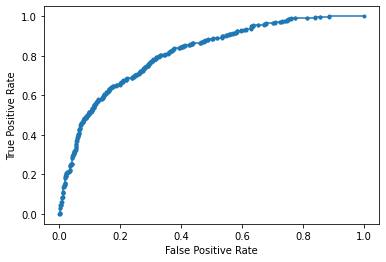

In [53]:
plt.plot(log_reg_fpr, log_reg_tpr, marker='.', label='Log_reg')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Decision tree classification

In [54]:
from sklearn.tree import DecisionTreeClassifier